08.1

In [3]:
import numpy as np

def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)

# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

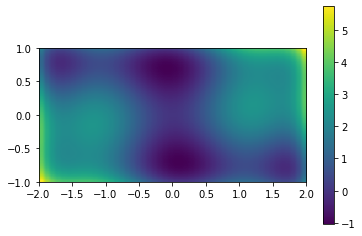

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()

Text(0.5, 0.92, 'Six-hump Camelback function')

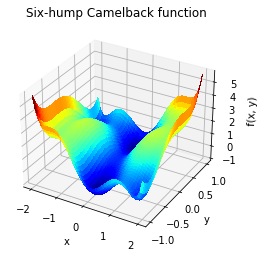

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

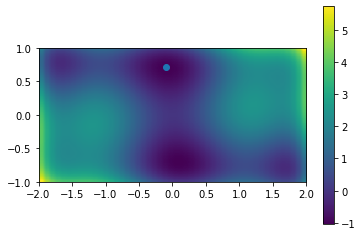

In [6]:
from scipy import optimize

x_min = optimize.minimize(sixhump, x0=[0, 0.1])

plt.figure()

plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()
# And the minimum that we've found:
plt.scatter(x_min.x[0], x_min.x[1])

plt.show()

In [7]:
x_min

      fun: -1.0316284534898148
 hess_inv: array([[ 0.12908062, -0.00794293],
       [-0.00794293,  0.06166789]])
      jac: array([-2.98023224e-08, -1.31130219e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([-0.08984201,  0.71265632])

We have 2 global minima, one of which is [-0.08984201,  0.71265632] with the function value of -1.0316284534898148
And the second minimum point is :

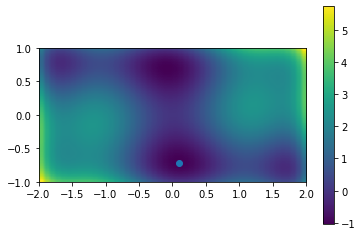

In [8]:
from scipy import optimize

x_min = optimize.minimize(sixhump, x0=[0, -0.1])

plt.figure()

plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()
# And the minimum that we've found:
plt.scatter(x_min.x[0], x_min.x[1])

plt.show()



In [9]:
x_min

      fun: -1.0316284534898346
 hess_inv: array([[ 0.12908056, -0.00794288],
       [-0.00794288,  0.0616679 ]])
      jac: array([2.98023224e-08, 1.29640102e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([ 0.089842  , -0.71265633])

the second minimum point is [ 0.089842  , -0.71265633], with the function value of -1.0316284534898346

in point of (0,0) we have local maximum which lead to be estimated as minimum by the function, and the funciton value of (0,0) is :

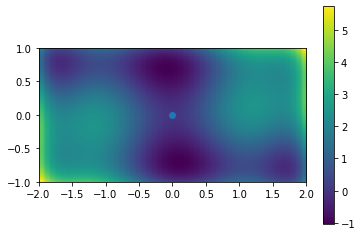

In [10]:
from scipy import optimize

x_min = optimize.minimize(sixhump, x0=[0, 0])

plt.figure()

plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()
# And the minimum that we've found:
plt.scatter(x_min.x[0], x_min.x[1])

plt.show()


In [11]:
x_min

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])

the function value of (0,0) is 0 which is more than other mentioned pooints

08.2

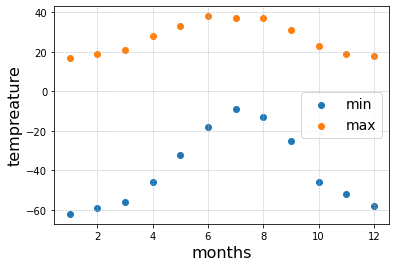

In [12]:
month=np.arange(1,13)
max=np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

plt.scatter(month,min,label='min')
plt.scatter(month,max,label='max')
plt.xlabel("months", fontsize=16)
plt.ylabel("tempreature", fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.grid(linestyle="--", linewidth=0.5)

In [13]:
def f(x, A, nu):
    return A * np.sin(nu * x)-40

In [14]:
popt, pcov = optimize.curve_fit(f,month,min, p0=[20,100 ], full_output=False)

In [15]:
popt

array([23.96863497, 99.88264215])

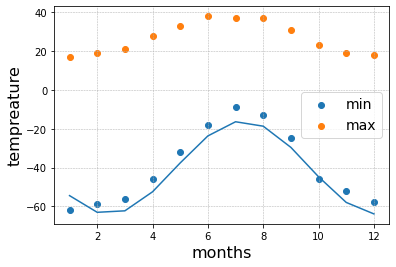

In [16]:
plt.plot(month,f(month,*popt))
plt.scatter(month,min,label='min')
plt.scatter(month,max,label='max')
plt.xlabel("months", fontsize=16)
plt.ylabel("tempreature", fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.grid(linestyle="--", linewidth=0.5)

In [17]:
def f(x, A, nu):
    return A * np.sin(nu * x)+30

In [18]:
popt, pcov = optimize.curve_fit(f,month,max, p0=[20,100 ], full_output=False)

In [19]:
popt

array([10.96557954, 99.83789005])

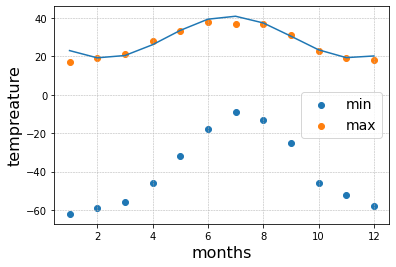

In [20]:
plt.plot(month,f(month,*popt))
plt.scatter(month,min,label='min')
plt.scatter(month,max,label='max')
plt.xlabel("months", fontsize=16)
plt.ylabel("tempreature", fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.grid(linestyle="--", linewidth=0.5)

08.3

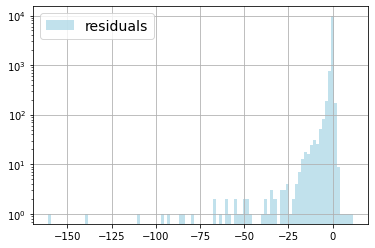

In [63]:
import pandas as pd
import numpy as np
import pickle


with open('residuals_261.pkl', 'rb') as f:
    data = pickle.load(f)
a=data.tolist()
data=a['residuals']
n, bins, patches = plt.hist(a['residuals'], 100, facecolor='lightblue', alpha=0.75, label='residuals')
plt.yscale('log')
plt.grid(True)
plt.legend(loc='best', fontsize=14)
uncertinty=np.sqrt(n)

plt.yscale('log')

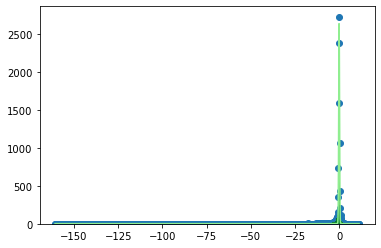

In [65]:
n, bins, patches = plt.hist(a['residuals'], 1000, facecolor='g', alpha=0.75)
x=(bins[1:]+bins[:-1])/2
y=[]
for i in range(len(n)):
    y.append(n[i])
plt.scatter(x,y)
# plt.yscale('log')

def f(x,N,mu,sig,off):
    return N*np.exp(-np.power(x-mu,2)/(2*np.power(sig,2)))+off

y=np.asarray(y)
p0,p1 = optimize.curve_fit(f,x,y)
plt.plot(x,f(x,*p0),'lightgreen')

In [66]:
ssr = np.sum((y-(f(x,*p0)))**2)
tss = np.sum((np.mean(y) - y)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x,y)) # check with the correlation matrix that R is the correlation coefficient

R2 = 0.987701603616305 
R = 0.9938317783288604
Covariance matrix:
 [[1.         0.12523836]
 [0.12523836 1.        ]]


In [68]:
from scipy import stats
#p = np.arange(-150,0, 0.1)
ndof = len(x) - 4
sigma_y = np.sqrt(np.abs(y))
print("n degrees of freedom =", ndof)
# calculate the chi^2
chi2 = (np.sum((y-f(x,*p0))**2)/np.sum(unc))
print("chi2 =", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

n degrees of freedom = 996
chi2 = 890.4077856254723
p-value = 0.9926557020054368


08.4

In [70]:
import pandas as pd
file_name=r"C:\Users\Roya\munich_temperatures_average_with_bad_data.txt"
data=pd.read_csv(file_name,sep=" ",header=None)
data

,0,1
0,1995.00274,0.944444
1,1995.00548,-1.611110
2,1995.00821,-3.555560
3,1995.01095,-9.833330
4,1995.01369,-10.222200
...,...,...
6674,2013.27379,7.333330
6675,2013.27652,10.000000
6676,2013.27926,10.555600
6677,2013.28200,8.944440


In [71]:
data_lim=data[(data[0]> 2008) & (data[0]<2012)]

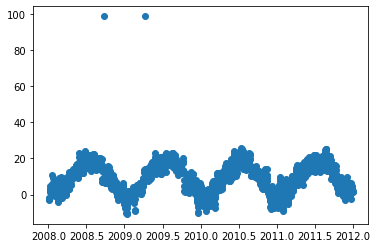

In [73]:
import matplotlib.pyplot as plt
plt.scatter(data_lim[0],data_lim[1])

In [118]:
x=data_lim[0]
y=data_lim[1]
def f (t,a,b,c) :
    return (a*np.cos(2*np.pi*t+b))+c


In [119]:
popt, pcov = optimize.curve_fit(f,x,y)

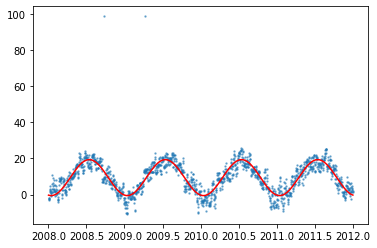

In [120]:
plt.scatter(data_lim[0],data_lim[1],s=2,alpha=0.5)
plt.plot(data_lim[0],f(data_lim[0],*popt),'r')

In [121]:
popt

array([-9.98813369, 12.33302301,  9.38411487])

In [122]:
#best values:
print('best values:','a=',popt[0],'b=',popt[1],'c=',popt[2])

best values: a= -9.988133689134516 b= 12.333023014196588 c= 9.38411486809072


In [123]:
print('average of the years :',np.mean(data_lim[1]))

average of the years : 9.38409773497604


In [124]:
dd=np.linspace(int(np.min(data_lim[0])),int(np.max(data_lim[0])),1000)
mn=np.min(f(dd,*popt))
mx=np.max(f(dd,*popt))
print('for function:','maximum temp=',mx,'min temp=',mn)

for function: maximum temp= 19.372217151652062 min temp= -0.6037792240876048


In [125]:
ssr = np.sum((y-(f(x,*popt)))**2)
tss = np.sum((np.mean(y) - y)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x,y)) # check with the correlation matrix that R is the correlation coefficient

R2 = 0.6795934800804344 
R = 0.8243745993663526
Covariance matrix:
 [[1.         0.01341277]
 [0.01341277 1.        ]]


In the physical sciences, "b" is the wavenumber which is the spatial frequency of a wave. In this case "b" is 12.3, the reason of which is every 12 months the temoreature gets back to the same tempreature.

In [110]:
def g (t,a,b,c,d) :
    return (a*np.cos(2*np.pi*b*t+c))+d

In [127]:
popt, pcov = optimize.curve_fit(g,data[0],data[1])

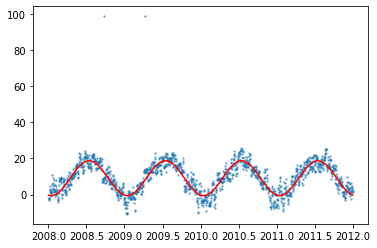

In [128]:
plt.scatter(data_lim[0],data_lim[1],s=2,alpha=0.5)
plt.plot(data_lim[0],g(data_lim[0],*popt),'r')

In [129]:
popt

array([-9.67161388,  0.99973966, 15.62125672,  9.05135226])

In [130]:
ssr = np.sum((y-(g(x,*popt)))**2)
tss = np.sum((np.mean(y) - y)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x,y)) # check with the correlation matrix that R is the correlation coefficient

R2 = 0.6773945545324296 
R = 0.8230398256053164
Covariance matrix:
 [[1.         0.01341277]
 [0.01341277 1.        ]]


SSR: 34359.85859996652 34352.794053704085
Test Linear vs f:
CL: 0.584 , additional parameter necessary: NO


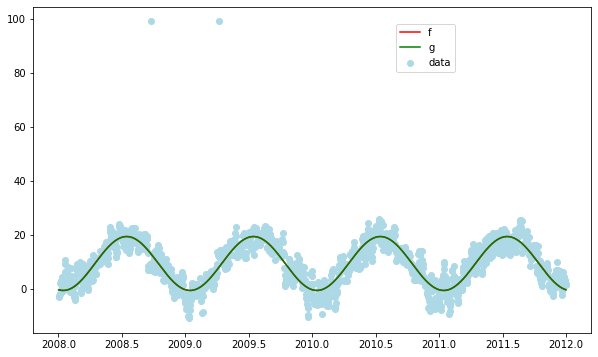

In [134]:
# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL


# generate data according to a certain distribution + random noise

# plot
fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.scatter(x=x, y=y, marker='o', c='lightblue', label="data")
N=len(x)


fs, cov = optimize.curve_fit(f, x, y)
y1 = f(x, *fs)
ax.plot(x, y1, color='r', label="f")
ssr_1 = np.sum((y1 - y)**2)
ndof_1 = 3 - 1 # n of parameters - 1

fg, cov = optimize.curve_fit(g, x, y)
y2 = g(x, *fg)
ax.plot(x, y2, color='g', label="g")
ssr_2 = np.sum((y2 - y)**2)
ndof_2 = 4 - 1 # n of parameters - 1



ax.legend(loc=(0.65, 0.8))

print("SSR:", ssr_1, ssr_2)

# run F-test
# test f2 vs f1
print("Test Linear vs f:")
cl_1_vs_2 = Ftest(ssr_1, ssr_2, ndof_1, ndof_2, N, verbose=True)
